# Mining Social and Geographic Datasets GEOGG153 (Masters)

Notebook instructions:
1. The following notebook requires the download of the Cambridge_gowalla.csv to be in the same workspace folder as the ipynb file.
2. Please make sure that the neccesary libraries are installed and imported, as outlined in the file.

# 1. Mobility pattern analysis task

        1.1. Visualisation of check-in locations of the CG datasets for users 75027, 102829, using the Folium library.

In [1]:
#Required Library Imports

import folium
import folium.plugins
from folium import FeatureGroup, LayerControl, Map, Marker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import osmnx as ox
import networkx as nx
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Cambridge_gowalla.csv')

In [3]:
df1_27=df[df['User_ID']==75027]
df2_29=df[df['User_ID']==102829]

In [4]:
# Assigning coordinates to dataframe
Longitude=df['lon']
Latitude=df['lat']

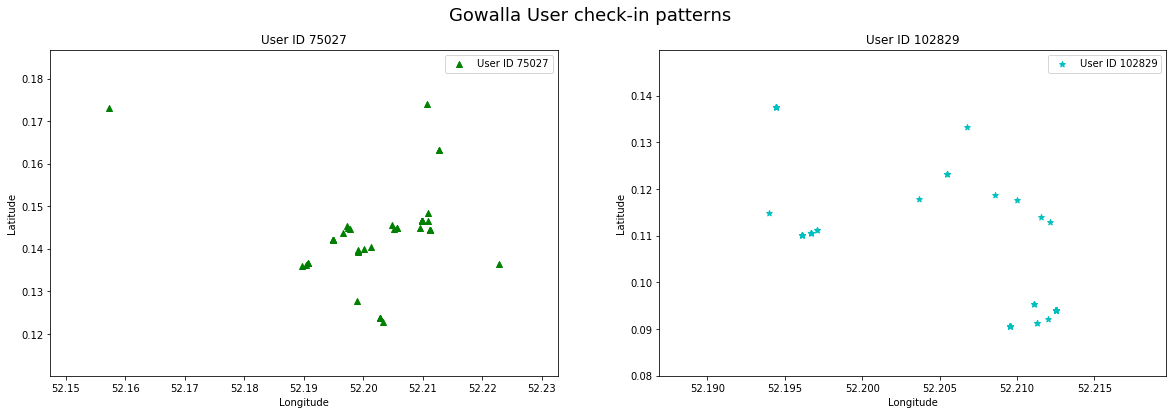

In [5]:
fig,ax = plt.subplots(1,2,figsize=(20,6))

ax[0].scatter(df1_27.lat,df1_27.lon,c='g',marker='^',label='User ID 75027')
ax[1].scatter(df2_29.lat,df2_29.lon,c='c',marker='*',label='User ID 102829')

ax[0].set_title('User ID 75027')
ax[0].set(xlabel='Longitude',ylabel='Latitude')
ax[0].legend()

ax[1].set_title('User ID 102829')
ax[1].legend()
ax[1].set(xlabel='Longitude',ylabel='Latitude')

fig.suptitle('Gowalla User check-in patterns',fontsize=18)
plt.savefig('Gowallacheckinpatternsgraph.png')
plt.show()

In [6]:
m = folium.Map([52.21070073, 0.174108233], zoom_start=14)

In [7]:
m1 = folium.Map([52.21070073, 0.174108233], zoom_start=14)

In [8]:
for index, row in df1_27.iterrows():
    folium.Marker([row['lat'], row['lon']], 
                  icon=folium.Icon(icon='cloud')
                 ).add_to(m)
m

In [9]:
for index, row in df2_29.iterrows():
    folium.Marker([row['lat'], row['lon']], 
                icon = folium.Icon(color='red')
                 ).add_to(m1)
m1

In [10]:
m = folium.Map([52.21070073, 0.174108233], zoom_start=14)

for index, row in df1_27.iterrows():
    folium.Marker([row['lat'], row['lon']], 
                  icon=folium.Icon(icon='cloud')
                 ).add_to(m)
m

for index, row in df2_29.iterrows():
    folium.Marker([row['lat'], row['lon']], 
                icon = folium.Icon(color='purple')
                 ).add_to(m)
m

In [11]:
m.save(outfile='checkin-user75027-102829.html')

                                    1.2. User Check-in frequency characteristics

In [12]:
frequency_75027 = df1_27['date'].value_counts().rename_axis('Date').reset_index(name='Total-Check-in')
frequency_75027.sort_values(by=['Date'], inplace=True)
frequency_75027.tail()

Date  Total-Check-in
4   27/01/2010               4
3   28/01/2010               4
11  29/01/2010               2
0   30/01/2010               9
17  31/01/2010               1

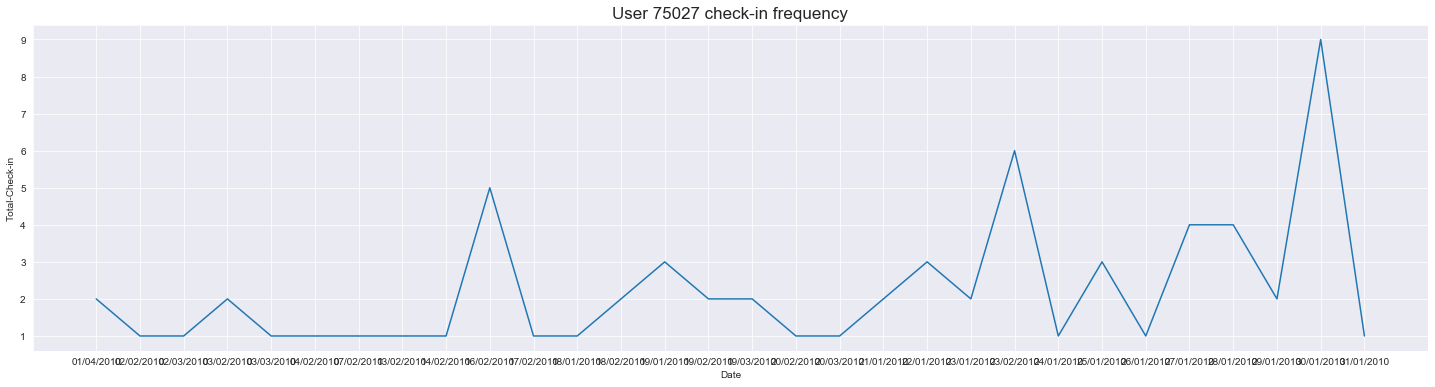

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,6))
plt.title('User 75027 check-in frequency', fontsize=17)

sns.lineplot(x=frequency_75027['Date'], y=frequency_75027['Total-Check-in'])
plt.savefig('User75027check-infrequency.png')

In [14]:
frequency_102829 = df2_29['date'].value_counts().rename_axis('Date').reset_index(name='Total-Check-in')
frequency_102829.sort_values(by=['Date'], inplace=True)
frequency_102829.tail() 

Date  Total-Check-in
2  26/05/2010               5
3  27/04/2010               4
7  27/05/2010               4
1  28/04/2010               5
5  29/04/2010               4

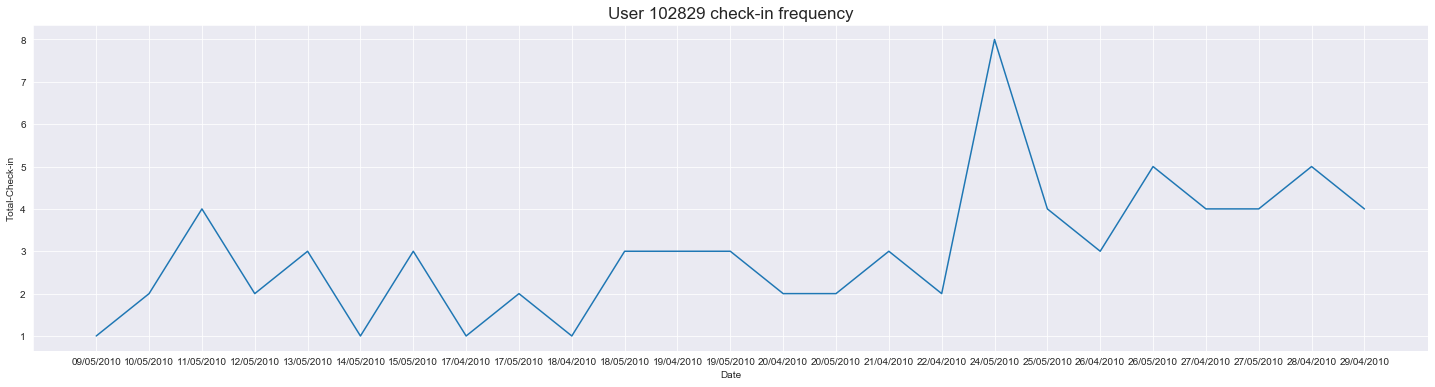

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,6))
plt.title('User 102829 check-in frequency', fontsize=17)
sns.lineplot(x=frequency_102829['Date'], y=frequency_102829['Total-Check-in'])
plt.savefig('User102829check-infrequency.png')

            1.3. Characterisation of the GC dataset for user 75027 on 30/01/2010 and user 102829 on 11/05/2010

In [16]:
# Pre-processing data
user_75027_30 = df1_27[(df1_27.date == '30/01/2010')]
user_102829_11 = df2_29[(df2_29.date == '11/05/2010')]

In [17]:
user_75027_30

ID  User_ID        date      Time       lon        lat  loc_ID
1219  1220    75027  30/01/2010  22:14:11  0.123643  52.202858  473651
1220  1221    75027  30/01/2010  21:27:50  0.127612  52.198955   31328
1221  1222    75027  30/01/2010  17:20:55  0.144424  52.211325  374196
1222  1223    75027  30/01/2010  17:05:41  0.144786  52.209487  159331
1223  1224    75027  30/01/2010  16:59:45  0.146594  52.209822  373382
1224  1225    75027  30/01/2010  16:15:35  0.144826  52.205650  478191
1225  1226    75027  30/01/2010  16:06:57  0.144522  52.205200  478133
1226  1227    75027  30/01/2010  16:04:04  0.145606  52.204923   31968
1227  1228    75027  30/01/2010  15:13:43  0.173005  52.157223  477840

In [18]:
user_102829_11

ID  User_ID        date      Time       lon        lat   loc_ID
1395  1396   102829  11/05/2010  18:03:09  0.110528  52.196678   963000
1396  1397   102829  11/05/2010  10:57:10  0.095404  52.211119  1031743
1397  1398   102829  11/05/2010  07:24:49  0.094001  52.212543   373983
1398  1399   102829  11/05/2010  06:30:18  0.110121  52.196113  1024097

In [19]:
# The street network for Cambridge and the network type: Drive
G=ox.graph_from_place('Cambridge,UK',network_type='drive')

                        1.4. Origin-Destination route characterisation for Gowalla user: 102829
*Note route graph figures have been commented out for faster running of the program, please uncomment to view the route graphs

In [20]:
# The origin-destination route for user 102829 from Location ID 1024097 to 373983 for user 102829 on 11/05/2010.

origin_point_102829_1 = (52.196113, 0.110121) 
destination_point_102829_1 = (52.212543, 0.094001)  
origin_node_102829_1 = ox.get_nearest_node(G, origin_point_102829_1)
destination_node_102829_1 = ox.get_nearest_node(G, destination_point_102829_1)

# calculate the shortest path between origin and destination nodes
OD_route_102829_1 = nx.shortest_path(G, origin_node_102829_1, destination_node_102829_1, weight='length')
print("This is the origin-destination route for user 102829 from Location ID 1024097 to 373983:", str(OD_route_102829_1))

This is the origin-destination route for user 102829 from Location ID 1024097 to 373983: [20962781, 15431272, 20963035, 20962924, 20963153, 20963341, 20963229, 20962957, 20963255, 20963137, 20963053, 20962879, 104570, 20963168, 104576, 20962937, 20963086, 104581, 5313641, 104582, 104583, 20963171, 104584]


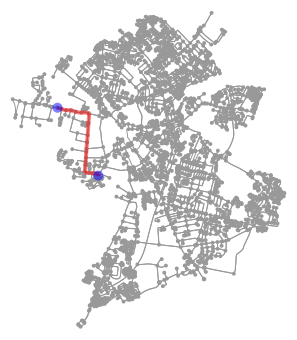

In [21]:
fig, ax = ox.plot_graph_route(G, OD_route_102829_1, origin_point=origin_point_102829_1, destination_point=destination_point_102829_1, save=True, filename="102829_1", file_format="png")

In [22]:
# The origin-destination route for user 102829 from Location ID 1031743 to 963000 for user 102829 on 11/05/2010.

origin_point_102829_2 = (52.211119, 0.095404) 
destination_point_102829_2 = (52.196678, 0.110528) 
origin_node_102829_2 = ox.get_nearest_node(G, origin_point_102829_2)
destination_node_102829_2 = ox.get_nearest_node(G, destination_point_102829_2)

# calculate the shortest path between origin and destination nodes
OD_route_102829_2 = nx.shortest_path(G, origin_node_102829_2, destination_node_102829_2, weight='length')
print("This is the origin-destination route for user 102829 on the 11/05/2010:", str(OD_route_102829_2))

This is the origin-destination route for user 102829 on the 11/05/2010: [20963279, 104583, 104582, 5313641, 104581, 20963086, 20962937, 104576, 20963168, 104570, 20962879, 20963053, 20963137, 20963255, 20962957, 20963229, 20963341, 20963153, 20962924, 20963035, 15431272]


In [23]:
#fig, ax = ox.plot_graph_route(G, OD_route_102829_2, origin_point=origin_point_102829_2, destination_point=destination_point_102829_2)

In [24]:
# The origin-destination route for user 102829 from Location ID 1024097 to 373983 for user 102829 on 11/05/2010.

origin_point_102829_3 = (52.212543, 0.094001)
destination_point_102829_3 = (52.211119, 0.095404) 
origin_node_102829_3 = ox.get_nearest_node(G, origin_point_102829_3)
destination_node_102829_3 = ox.get_nearest_node(G, destination_point_102829_3)

# calculate the shortest path between origin and destination nodes
OD_route_102829_3 = nx.shortest_path(G, origin_node_102829_3, destination_node_102829_3, weight='length')
print("This is the origin-destination route for user 102829 on the 11/05/2010:", str(OD_route_102829_3))

This is the origin-destination route for user 102829 on the 11/05/2010: [104584, 20963171, 104583, 20963279]


In [25]:
#fig, ax = ox.plot_graph_route(G, OD_route_102829_3, origin_point=origin_point_102829_3, destination_point=destination_point_102829_3)

In [26]:
# route length metres
dist1 = nx.shortest_path_length(G, origin_node_102829_1, destination_node_102829_1, weight='length')
dist1

2920.3600000000006

In [27]:
# route length metres
dist2 = nx.shortest_path_length(G, origin_node_102829_2, destination_node_102829_2, weight='length')
dist2

2741.867

In [28]:
dist3 = nx.shortest_path_length(G, origin_node_102829_3, destination_node_102829_3, weight='length')
dist3

383.84900000000005

In [29]:
print("The total distance travelled by user 102829 on 11/05/2010 is", dist1+dist2+dist3)

The total distance travelled by user 102829 on 11/05/2010 is 6046.076000000001


The first three cell calculate the total distance for user 75027 from the first trip to the last.

In [30]:
# user 75027 on 30/01/2010 
# define origin/desination points then get the nodes nearest to each
origin_point_75027_1 = (52.157223, 0.173005) 
destination_point_75027_1 = (52.202858, 0.123643)
origin_node_75027_1 = ox.get_nearest_node(G, origin_point_75027_1)
destination_node_75027_1 = ox.get_nearest_node(G, destination_point_75027_1)

# calculate the shortest path between origin and destination nodes
OD_route_75027_1 = nx.shortest_path(G, origin_node_75027_1, destination_node_75027_1, weight='length')
print("This is the origin-destination route for user 75027 on the 30/01/2010:", str(OD_route_75027_1))

This is the origin-destination route for user 75027 on the 30/01/2010: [20922527, 25288280, 20922531, 443903540, 554263, 673845809, 554283, 554272, 482307363, 482307373, 554269, 725608491, 5457750027, 554294, 8085920, 1486045382, 1486034654, 1486034699, 1486034710, 1486034675, 1486034731, 1486034690, 1486034683, 24670902, 1851353460, 14913680, 672557749, 554296, 36325153, 1479444535, 1479444522, 2197542100, 1479444515, 1479444520, 1244720067, 6572081, 21390893, 21390924, 21390925, 21390913, 21390914, 21390944, 21390915, 21390916, 609066, 20922087, 20922085, 20922086, 104550, 609752, 104549, 1547164562, 104521]


In [31]:
#fig, ax = ox.plot_graph_route(G, OD_route_75027_1, origin_point=origin_point_75027_1, destination_point=destination_point_75027_1, save=True, filename="OD75027", file_format="png")

In [32]:
# route length metres
dist4 = nx.shortest_path_length(G, origin_node_75027_1, destination_node_75027_1, weight='length')
print("The total distance travelled by user 75027 on 30/01/2010 is", dist4)

The total distance travelled by user 75027 on 30/01/2010 is 5284.094000000002


                        1.5. Origin-Destination route characterisation for Gowalla user: 75027 

In [33]:
# user 75027 on 30/01/2010 
# define origin/desination points then get the nodes nearest to each
origin_point_75027_2 = (52.157223, 0.173005) 
destination_point_75027_2 = (52.204923, 0.145606)
origin_node_75027_2 = ox.get_nearest_node(G, origin_point_75027_2)
destination_node_75027_2 = ox.get_nearest_node(G, destination_point_75027_2)

# calculate the shortest path between origin and destination nodes
OD_route_75027_2 = nx.shortest_path(G, origin_node_75027_2, destination_node_75027_2, weight='length')
print("This is the origin-destination route for user 75027 on the 30/01/2010:", str(OD_route_75027_2))

This is the origin-destination route for user 75027 on the 30/01/2010: [20922527, 25288280, 20922531, 443903540, 554263, 673845809, 554283, 554272, 482307363, 482307373, 554269, 725608491, 5457750027, 554294, 8085920, 1486045382, 1486034654, 1486034699, 1486034710, 20922506, 25288228, 20922508, 4788674901, 1874306954, 1485960862, 14913672, 20947749, 19287470, 18382663, 24670769, 6572126, 1573048383, 6550159, 1573048384, 1573048391, 1573048392, 1573048402, 20458686, 20458767, 20458766, 20458774, 20458775, 20458658, 20458651, 98936372, 1513021086]


In [34]:
#fig, ax = ox.plot_graph_route(G, OD_route_75027_2, origin_point=origin_point_75027_2, destination_point=destination_point_75027_2)

In [35]:
# route length metres
dist5 = nx.shortest_path_length(G, origin_node_75027_2, destination_node_75027_2, weight='length')
dist5

5437.241

In [36]:
# user 75027 on 30/01/2010 
# define origin/desination points then get the nodes nearest to each
origin_point_75027_2_3 = (52.204923, 0.145606) 
destination_point_75027_2_3 = (52.205200, 0.144522)
origin_node_75027_2_3 = ox.get_nearest_node(G, origin_point_75027_2_3)
destination_node_75027_2_3 = ox.get_nearest_node(G, destination_point_75027_2_3)

# calculate the shortest path between origin and destination nodes
OD_route_75027_2_3 = nx.shortest_path(G, origin_node_75027_2_3, destination_node_75027_2_3, weight='length')
print("This is the origin-destination route for user 75027 on the 30/01/2010:", str(OD_route_75027_2_3))

This is the origin-destination route for user 75027 on the 30/01/2010: [1513021086, 98936372, 2580731394, 1468100412, 705448024, 526297006, 1572499284, 16713913, 19851346, 20826574, 20826570, 20826563, 527446635, 1480048755, 20826576, 20826577, 19851527, 14913698, 20826601, 20826606]


In [37]:
# route length metres
dist5_1 = nx.shortest_path_length(G, origin_node_75027_2, destination_node_75027_2, weight='length')
dist5_1

5437.241

In [38]:
# user 75027 on 30/01/2010 
# define origin/desination points then get the nodes nearest to each
origin_point_75027_3 = (52.205200, 0.144522) 
destination_point_75027_3 = (52.205650, 0.144826)
origin_node_75027_3 = ox.get_nearest_node(G, origin_point_75027_3)
destination_node_75027_3 = ox.get_nearest_node(G, destination_point_75027_3)

# calculate the shortest path between origin and destination nodes
OD_route_75027_3 = nx.shortest_path(G, origin_node_75027_3, destination_node_75027_3, weight='length')
print("This is the origin-destination route for user 75027 on the 30/01/2010:", str(OD_route_75027_3))

This is the origin-destination route for user 75027 on the 30/01/2010: [20826606, 20826601, 14913698, 19851527, 20826577, 20826576, 1480048755, 20826569, 20826570, 20826574, 19851346, 16713913, 1572499286, 1572499313, 705448024, 1468100412, 2580731394, 98936372, 1513021086]


In [39]:
#fig, ax = ox.plot_graph_route(G, OD_route_75027_3, origin_point=origin_point_75027_3, destination_point=destination_point_75027_3)

In [40]:
# route length metres
dist6 = nx.shortest_path_length(G, origin_node_75027_3, destination_node_75027_3, weight='length')
dist6

1832.8509999999997

In [41]:
# user 75027 on 30/01/2010 
# define origin/desination points then get the nodes nearest to each
origin_point_75027_4 = (52.205650, 0.144826) 
destination_point_75027_4 = (52.209822, 0.146594)
origin_node_75027_4 = ox.get_nearest_node(G, origin_point_75027_4)
destination_node_75027_4 = ox.get_nearest_node(G, destination_point_75027_4)

# calculate the shortest path between origin and destination nodes
OD_route_75027_4 = nx.shortest_path(G, origin_node_75027_4, destination_node_75027_4, weight='length')
print("This is the origin-destination route for user 75027 on the 30/01/2010:", str(OD_route_75027_4))

This is the origin-destination route for user 75027 on the 30/01/2010: [1513021086, 98936372, 2580731394, 1468100412, 705448024, 526297006, 1572499284, 16713913, 19851346, 20826574, 1479440043, 8093704, 8093705, 6571876, 19851202, 19851203]


In [42]:
#fig, ax = ox.plot_graph_route(G, OD_route_75027_4, origin_point=origin_point_75027_4, destination_point=destination_point_75027_4)

In [43]:
# route length metres
dist7 = nx.shortest_path_length(G, origin_node_75027_4, destination_node_75027_4, weight='length')
dist7

1395.675

In [44]:
# user 75027 on 30/01/2010 
# define origin/desination points then get the nodes nearest to each
origin_point_75027_5 = (52.209822, 0.146594) 
destination_point_75027_5 = (52.209487, 0.144786)
origin_node_75027_5 = ox.get_nearest_node(G, origin_point_75027_5)
destination_node_75027_5 = ox.get_nearest_node(G, destination_point_75027_5)

# calculate the shortest path between origin and destination nodes
OD_route_75027_5 = nx.shortest_path(G, origin_node_75027_5, destination_node_75027_5, weight='length')
print("This is the origin-destination route for user 75027 on the 30/01/2010:", str(OD_route_75027_5))

This is the origin-destination route for user 75027 on the 30/01/2010: [19851203, 608910]


In [45]:
#fig, ax = ox.plot_graph_route(G, OD_route_75027_5, origin_point=origin_point_75027_5, destination_point=destination_point_75027_5)

In [46]:
# route length metres
dist8 = nx.shortest_path_length(G, origin_node_75027_5, destination_node_75027_5, weight='length')
dist8

303.23299999999995

In [47]:
# user 75027 on 30/01/2010 
# define origin/desination points then get the nodes nearest to each
origin_point_75027_6 = (52.209487, 0.144786) 
destination_point_75027_6 = (52.211325, 0.144424)
origin_node_75027_6 = ox.get_nearest_node(G, origin_point_75027_6)
destination_node_75027_6 = ox.get_nearest_node(G, destination_point_75027_6)

# calculate the shortest path between origin and destination nodes
OD_route_75027_6 = nx.shortest_path(G, origin_node_75027_6, destination_node_75027_6, weight='length')
print("This is the origin-destination route for user 75027 on the 30/01/2010:", str(OD_route_75027_6))

This is the origin-destination route for user 75027 on the 30/01/2010: [608910, 6571876, 19851202, 1333813717, 19851244]


In [48]:
#fig, ax = ox.plot_graph_route(G, OD_route_75027_6, origin_point=origin_point_75027_6, destination_point=destination_point_75027_6)

In [49]:
# route length metres
dist9 = nx.shortest_path_length(G, origin_node_75027_6, destination_node_75027_6, weight='length')
dist9

401.68

In [50]:
# user 75027 on 30/01/2010 
# define origin/desination points then get the nodes nearest to each
origin_point_75027_7 = (52.211325, 0.14442) 
destination_point_75027_7 = (52.198955, 0.127612)
origin_node_75027_7 = ox.get_nearest_node(G, origin_point_75027_7)
destination_node_75027_7 = ox.get_nearest_node(G, destination_point_75027_7)

# calculate the shortest path between origin and destination nodes
OD_route_75027_7 = nx.shortest_path(G, origin_node_75027_7, destination_node_75027_7, weight='length')
print("This is the origin-destination route for user 75027 on the 30/01/2010:", str(OD_route_75027_7))

This is the origin-destination route for user 75027 on the 30/01/2010: [19851244, 1333813717, 19851202, 19851203, 608910, 8093704, 1479440056, 687022861, 687022827, 687658067, 687657861, 687657858, 687657849, 20823603, 20823602, 20823601, 1503083241, 515981814, 6550167, 15700280, 609064]


In [51]:
# route length metres
dist10 = nx.shortest_path_length(G, origin_node_75027_7, destination_node_75027_7, weight='length')
dist10

2025.3049999999998

In [52]:
# user 75027 on 30/01/2010 
# define origin/desination points then get the nodes nearest to each
origin_point_75027_8 = (52.198955, 0.127612) 
destination_point_75027_8 = (52.202858, 0.123643)
origin_node_75027_8 = ox.get_nearest_node(G, origin_point_75027_8)
destination_node_75027_8 = ox.get_nearest_node(G, destination_point_75027_8)

# calculate the shortest path between origin and destination nodes
OD_route_75027_8 = nx.shortest_path(G, origin_node_75027_8, destination_node_75027_8, weight='length')
print("This is the origin-destination route for user 75027 on the 30/01/2010:", str(OD_route_75027_8))

This is the origin-destination route for user 75027 on the 30/01/2010: [609064, 609066, 20922087, 20922085, 20922086, 104550, 609752, 104549, 1547164562, 104521]


In [53]:
# route length metres
dist11 = nx.shortest_path_length(G, origin_node_75027_8, destination_node_75027_8, weight='length')
dist11

1065.509

In [54]:
print("The total distance travelled by user 75027 on 30/01/2010 is", dist5+dist5_1+dist6+dist6+dist7+dist8+dist9+dist10+dist11)

The total distance travelled by user 75027 on 30/01/2010 is 19731.585999999996


                                    1.6. Closeness centrality measure

In [55]:
edge_cc = nx.closeness_centrality(nx.line_graph(G))

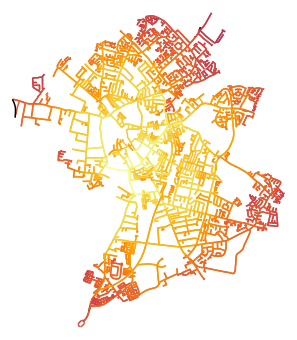

In [56]:
# list of edge values for the orginal graph
ev = [edge_cc[edge + (0,)] for edge in G.edges()]
 
# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, axis_off=True, node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1,save=True)

# 2. Machine Learning Task

                                2.1. California House Price dataset Exploratory analysis

In [57]:
from sklearn.datasets import fetch_california_housing
import matplotlib.cm as cm
import os
from sklearn.model_selection import train_test_split
from sklearn import datasets
import plotly.express as px

In [58]:
cal_housing = fetch_california_housing()

In [59]:
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target*100000 #Temp processing of median house price variable for better scaling of dataset in visualisation. 

Pre-processing data for map visualisation and correlation matrix production

In [60]:
# Pre-processing to build correlation matrix for california house price dataset will all feature values + Map Visualisation
price = pd.DataFrame(y)
price.columns = ['Median House Price']
houseprice=pd.DataFrame([price], columns = ["Median House Price"])
X[price.columns] = price

In [61]:
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Median House Price  
0    -122.23            452600.0  
1    -122.22            358500.0  
2    -122.24            352100.0  
3    -122.25            341300.0  
4    -122.25            342200.0

                               2.2. Exploring the dataset using a correlation matrix

*The following visualisation code has been adapted from the authors publicly available code at footnote 1.

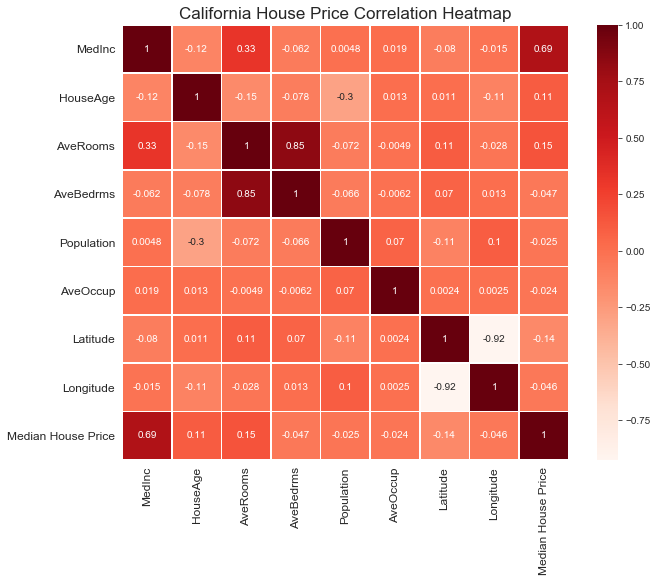

In [62]:
# Figure for correlation matrix as a heatmap for visualisation of result.

fig, ax = plt.subplots(figsize=(10, 8)) 

sns.heatmap(X.corr(),annot=True,cmap="Reds",linecolor='white',linewidths=0.5)

plt.title('California House Price Correlation Heatmap',fontsize=17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax.yaxis.grid(True)
plt.savefig('CorrelationHeatmap.png')
plt.show()

Exploring the dataset further by trying to find variables most correlated to the house price of California

In [63]:
correlation_matrix = X.corr()
correlation_matrix['Median House Price'].sort_values(ascending=False)

Median House Price    1.000000
MedInc                0.688075
AveRooms              0.151948
HouseAge              0.105623
AveOccup             -0.023737
Population           -0.024650
Longitude            -0.045967
AveBedrms            -0.046701
Latitude             -0.144160
Name: Median House Price, dtype: float64

In [64]:
correlation_matrix.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   

            Latitude  Longitude  Median House Price  
MedInc     -0.079809  -0.015176            0.688075  
HouseAge    0.011173  -0.108197            0.105623  
AveRooms    0.106389  -0.027540            0.151948  
AveBedrms   0.069721   0.013344           -0.046701  
Population -0.108785   0.099773           -0.024650

In [65]:
housingmatrixcorrelation = list(correlation_matrix[abs(correlation_matrix['Median House Price'])>0.05].T.columns)
print("The California House Price value has great correlation between these variables:",housingmatrixcorrelation)

The California House Price value has great correlation between these variables: ['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Median House Price']


*The following visualisation code has been adapted from the authors publicly available code at footnote 2.

In [66]:
fig = px.scatter(X, x="Longitude", y="Latitude",color="Median House Price", color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(
    height=800,
    title_text='California House Prices (1990 U.S. Census)'
)
fig.show()

                                           2.3. Machine learning models 

In [67]:
# Re-running previous cell to set Xy values back to default for further processing of Machine learning algorithms.
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target*100000

Dataset split into train and test set with an 80/20 split ratio.

In [68]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_X = scaler.fit_transform(X)

In [69]:
# Splitting the dataset 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2,shuffle=True, random_state=20)

                                           2.4. Linear Regression Model

In [70]:
from sklearn.linear_model import LinearRegression
lrm_model=LinearRegression()

In [71]:
lrm_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
lrm_y_pred=lrm_model.predict(X_test)

In [73]:
print("The Linear regression model score is:", lrm_model.score(X_train,y_train)) 

The Linear regression model score is: 0.6041796268622668


2.5. Linear Regression Model Results

In [74]:
from sklearn.metrics import r2_score,mean_squared_error
print("The Linear regression model r2 score is: ", r2_score(y_test,lrm_y_pred)) #0.6121654293404897

The Linear regression model r2 score is:  0.6121654293404897


In [75]:
print("The Linear regression model Mean Squared Error score is: ", mean_squared_error(y_test,lrm_y_pred)) #0.5410055769085325

The Linear regression model Mean Squared Error score is:  5410055769.085323


In [76]:
lrm_pred_orig = pd.DataFrame({'Predicted': lrm_y_pred, 'Original': y_test})
lrm_pred_orig.head(10) 

Predicted  Original
0  158299.034006  117600.0
1  301567.949430  292200.0
2  175417.604619  131300.0
3  268486.977078  265900.0
4  227248.362886  210200.0
5  162235.086404  162900.0
6  148018.831550  101200.0
7  154743.789106  114100.0
8  327816.277237  255400.0
9  275862.624033  259800.0

In [77]:
# Using a subset of the data from the original Linear Regressor regressor model output for data plotting 
lrm_pred_orig_sample = lrm_pred_orig.sample(100)
lrm_pred_orig_sample = lrm_pred_orig_sample.reset_index()

In [78]:
lrm_pred_orig_sample.head()

index      Predicted  Original
0   1306  245681.612429  211400.0
1   1548  114805.317297  137500.0
2   1918  322745.614411  500001.0
3   2970  239543.186585  202900.0
4   3011  175509.161046  128300.0

*The following visualisation code has been adapted from the authors publicly available code at footnote 3.

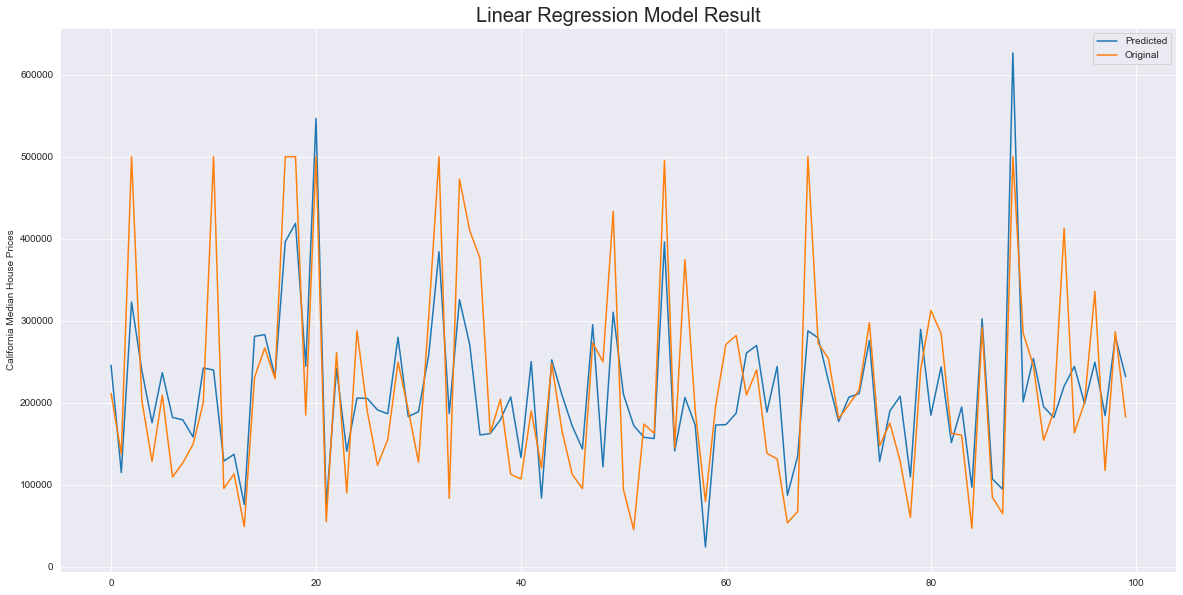

In [79]:
plt.figure(figsize = (20,10))
plt.plot(lrm_pred_orig_sample['Predicted'], label = 'Predicted')
plt.plot(lrm_pred_orig_sample['Original'], label='Original')
plt.ylabel('California Median House Prices')
plt.title('Linear Regression Model Result', fontsize=20)
plt.legend()
plt.savefig('LinearResult.png')
plt.show()

                                           2.6. Random Forest Regressor Model

In [80]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()

In [81]:
rfrmodel.fit(X_train,y_train)

C:\Users\petra\Anaconda3\envs\geospatial\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [82]:
print("The Random forest regressor model score is:", rfrmodel.score(X_train,y_train))

The Random forest regressor model score is: 0.9606926405783536


In [83]:
rfr_y_pred = rfrmodel.predict(X_test)

In [84]:
rfr_y_pred

array([159730., 242720., 149670., ...,  99810., 280640., 128800.])

In [85]:
from sklearn.metrics import r2_score,mean_squared_error
print("The Random forest regressor model r2 score is:", r2_score(y_test, rfr_y_pred))

The Random forest regressor model r2 score is: 0.7992135011616692


In [86]:
print("The Random forest regressor model Mean Squared Error score is:", mean_squared_error(y_test, rfr_y_pred))

The Random forest regressor model Mean Squared Error score is: 2800849224.3163514


In [87]:
rfr_pred_orig = pd.DataFrame({'Predicted': rfr_y_pred, 'Original': y_test})
rfr_pred_orig.head(10)

Predicted  Original
0   159730.0  117600.0
1   242720.0  292200.0
2   149670.0  131300.0
3   291770.0  265900.0
4   228470.0  210200.0
5   146300.0  162900.0
6   123750.0  101200.0
7   147660.0  114100.0
8   286350.0  255400.0
9   234140.0  259800.0

In [88]:
# Using a subset of the data from the original Random forest regressor model output for data plotting 
rfr_pred_orig_sample = rfr_pred_orig.sample(100)
rfr_pred_orig_sample = rfr_pred_orig_sample.reset_index()

In [89]:
rfr_pred_orig_sample.head()

index  Predicted  Original
0   1347   270920.0  243500.0
1   2988   203770.0  187300.0
2   1773   105980.0  102900.0
3   3514   221640.0  207500.0
4   1796   154970.0  161500.0

*The following visualisation code has been adapted from the authors publicly available code at footnote 3.

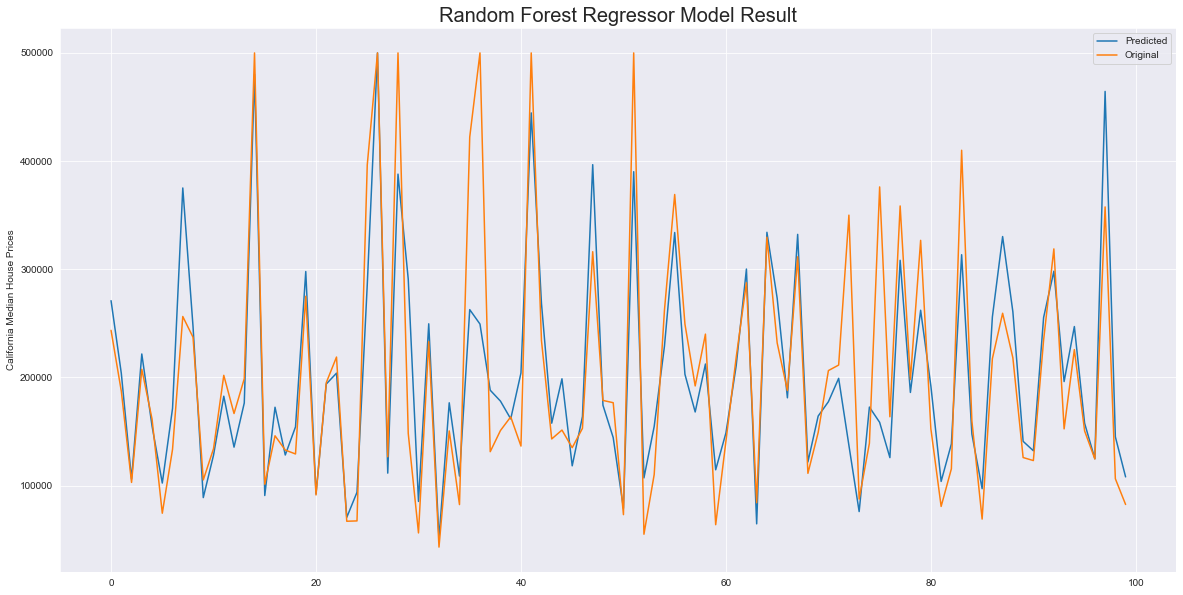

In [90]:
plt.figure(figsize = (20,10))
plt.plot(rfr_pred_orig_sample['Predicted'], label = 'Predicted')
plt.plot(rfr_pred_orig_sample['Original'], label='Original')
plt.ylabel('California Median House Prices')
plt.title('Random Forest Regressor Model Result', fontsize=20)
plt.legend()
plt.savefig('RandomForestResult.png')
plt.show()

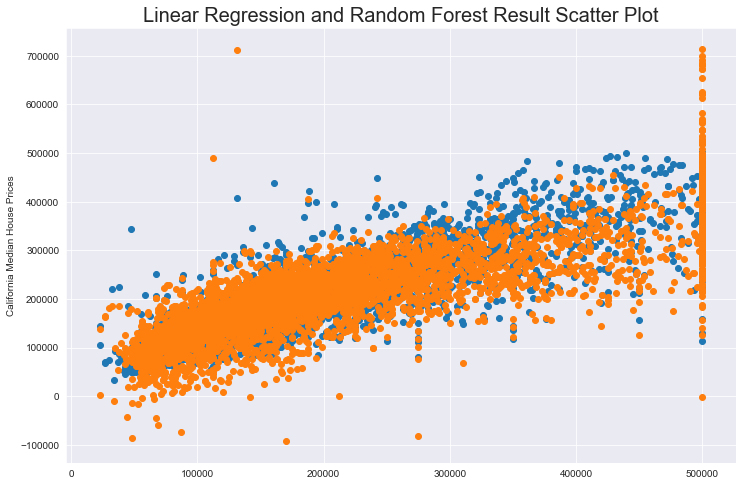

In [91]:
#Linear regression in Orange, Random Forest visualised in blue
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(y_test, rfr_y_pred)
plt.scatter(y_test, lrm_y_pred)
plt.ylabel('California Median House Prices')
#plt.legend_elements()
plt.title('Linear Regression and Random Forest Result Scatter Plot', fontsize=20)
plt.show()

Reference List

The code in this notebook has been adapted from various Mining and social geographic datasets class practicals, as well as from the footnotes below. 

1. url: https://datatofish.com/correlation-matrix-pandas/
2. url: https://www.kaggle.com/schopenhacker75/complete-beginner-guide
3. url: https://github.com/ravite9/LinearRegressionForPricePrediction

